### Classification model to predict if an employee will leave an organistion or not

In [4]:
import os
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
hr_data=pd.read_csv('HR_comma_sep.csv')

In [3]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
# Missing values
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [8]:
hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [9]:
hr_data['sales'].unique().tolist()

['sales',
 'accounting',
 'hr',
 'technical',
 'support',
 'management',
 'IT',
 'product_mng',
 'marketing',
 'RandD']

In [10]:
# changing column name as 'sales' is on of the departments
hr_data.rename(columns={'sales':'dept'},inplace=True)

In [13]:
hr_data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [14]:
# Splitting the data
X=hr_data.drop('left',axis=1)
y=hr_data['left']

In [15]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [16]:
X = pd.get_dummies(X)

In [17]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=400)

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# to use Bagging tree we need Decision tree class as we need Tree base model as base learner

In [23]:
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,
                      base_estimator=DecisionTreeClassifier())
# Out of bag error = TRUE

In [24]:
clf.fit(X_train,y_train)

C:\Users\ayushjain9\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:640: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ayushjain9\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20,
                  n_jobs=-1, oob_score=True, random_state=400)

In [25]:
clf.oob_score_

0.987415617968164

In [26]:
clf.score(X_test,y_test)

0.986

In [27]:
# Parameter Tuning
#n_estimators (number of trees we need in bagging estimators) so run for loop from 10 to 300 with a gap of 20

for w in range(10,300,20):
    clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,
                          base_estimator=DecisionTreeClassifier())
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

C:\Users\ayushjain9\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:640: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ayushjain9\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.9830819234936244
************************
For n_estimators = 30
OOB score is 0.9884990415867989
************************
For n_estimators = 50
OOB score is 0.9892491040920076
************************
For n_estimators = 70
OOB score is 0.9895824652054338
************************
For n_estimators = 90
OOB score is 0.990082506875573
************************
For n_estimators = 110
OOB score is 0.990082506875573
************************
For n_estimators = 130
OOB score is 0.9903325277106425
************************
For n_estimators = 150
OOB score is 0.990415867988999
************************
For n_estimators = 170
OOB score is 0.9902491874322861
************************
For n_estimators = 190
OOB score is 0.9901658471539295
************************
For n_estimators = 210
OOB score is 0.9902491874322861
************************
For n_estimators = 230
OOB score is 0.9902491874322861
************************
For n_estimators = 250
OOB score is 0.9900825068

#Out of bag error is good proxy for Out of sample accuracy. so we are not using grid/K-fold Cross validation.

150 is comming the good estimator

In [28]:
#Finalizing on a tree model with 150 trees
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=150,random_state=400,
                      base_estimator=DecisionTreeClassifier())
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=150,
                  n_jobs=-1, oob_score=True, random_state=400)

In [29]:
# Feature Importance
clf.estimators_

[DecisionTreeClassifier(random_state=1859118377),
 DecisionTreeClassifier(random_state=1559503733),
 DecisionTreeClassifier(random_state=1714796222),
 DecisionTreeClassifier(random_state=1907120008),
 DecisionTreeClassifier(random_state=2074988447),
 DecisionTreeClassifier(random_state=270530007),
 DecisionTreeClassifier(random_state=494610195),
 DecisionTreeClassifier(random_state=914653141),
 DecisionTreeClassifier(random_state=1249763274),
 DecisionTreeClassifier(random_state=1698305238),
 DecisionTreeClassifier(random_state=764038977),
 DecisionTreeClassifier(random_state=554023484),
 DecisionTreeClassifier(random_state=980045649),
 DecisionTreeClassifier(random_state=618787335),
 DecisionTreeClassifier(random_state=1478338621),
 DecisionTreeClassifier(random_state=878522688),
 DecisionTreeClassifier(random_state=1479530151),
 DecisionTreeClassifier(random_state=529095905),
 DecisionTreeClassifier(random_state=1322465795),
 DecisionTreeClassifier(random_state=2138769912),
 Decision

In [30]:
print(clf.estimators_[0])

DecisionTreeClassifier(random_state=1859118377)


In [31]:
print(clf.estimators_[0].feature_importances_)

[5.05132052e-01 1.32278580e-01 1.09549979e-01 7.25546688e-02
 1.56255590e-01 9.77054732e-04 3.25242845e-04 9.23910569e-04
 1.08261950e-03 2.53629992e-03 4.89557936e-04 1.25108377e-03
 8.91966484e-04 8.15148799e-04 2.43313148e-03 2.96579677e-03
 3.16560556e-03 5.68974302e-04 4.97063874e-03 8.32099901e-04]


In [32]:
# We can extract feature importance from each tree then take a mean for all trees
imp=[]
for i in clf.estimators_:
    imp.append(i.feature_importances_)
imp=np.mean(imp,axis=0)

In [33]:
feature_importance=pd.Series(imp,index=X.columns.tolist())

In [34]:
feature_importance.sort_values(ascending=False)

satisfaction_level       0.494407
last_evaluation          0.137858
time_spend_company       0.137458
number_project           0.110367
average_montly_hours     0.097566
dept_technical           0.003147
salary_low               0.003084
dept_support             0.002833
dept_sales               0.002540
salary_medium            0.002105
Work_accident            0.001563
dept_IT                  0.001550
dept_accounting          0.001391
salary_high              0.000888
dept_marketing           0.000714
dept_product_mng         0.000652
dept_RandD               0.000644
dept_hr                  0.000578
dept_management          0.000488
promotion_last_5years    0.000166
dtype: float64

Satisfaction level matters the most

<AxesSubplot:>

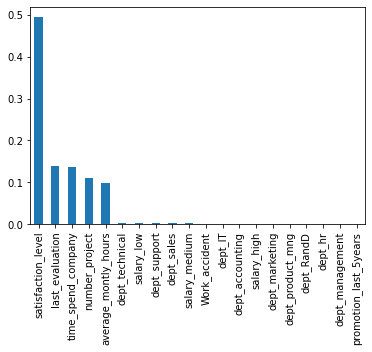

In [35]:
feature_importance.sort_values(ascending=False).plot(kind='bar')

### Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
clf=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)

In [39]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=80, n_jobs=-1, oob_score=True,
                       random_state=400)

In [40]:
clf.oob_score_

0.9905825485457121

In [42]:
# Parameter Tuning
for w in range(10,300,20):
    clf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

C:\Users\ayushjain9\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ayushjain9\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For n_estimators = 10
OOB score is 0.9832486040503375
************************
For n_estimators = 30
OOB score is 0.9894991249270773
************************
For n_estimators = 50
OOB score is 0.990082506875573
************************
For n_estimators = 70
OOB score is 0.9905825485457121
************************
For n_estimators = 90
OOB score is 0.9904992082673556
************************
For n_estimators = 110
OOB score is 0.9908325693807817
************************
For n_estimators = 130
OOB score is 0.9908325693807817
************************
For n_estimators = 150
OOB score is 0.9905825485457121
************************
For n_estimators = 170
OOB score is 0.9909992499374948
************************
For n_estimators = 190
OOB score is 0.9909159096591382
************************
For n_estimators = 210
OOB score is 0.9908325693807817
************************
For n_estimators = 230
OOB score is 0.9908325693807817
************************
For n_estimators = 250
OOB score is 0.99074922

oob_score increases till number of estimators are 190

In [43]:
#Finalize 190 trees
clf=RandomForestClassifier(n_estimators=190,oob_score=True,n_jobs=-1,random_state=400)

In [44]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=190, n_jobs=-1, oob_score=True,
                       random_state=400)

In [45]:
clf.oob_score_

0.9909159096591382

In [47]:
clf.feature_importances_
# for random forest classifier scikit give this feature

array([0.3138384 , 0.12430711, 0.18396834, 0.1514369 , 0.17650121,
       0.01018415, 0.00196677, 0.00182788, 0.0017952 , 0.00173233,
       0.00172401, 0.00170841, 0.00123802, 0.00118133, 0.00353554,
       0.00299638, 0.00370561, 0.00560635, 0.00722435, 0.00352169])

In [48]:
imp_feat=pd.Series(clf.feature_importances_,index=X.columns.tolist())

In [49]:
imp_feat.sort_values(ascending=False)

satisfaction_level       0.313838
number_project           0.183968
time_spend_company       0.176501
average_montly_hours     0.151437
last_evaluation          0.124307
Work_accident            0.010184
salary_low               0.007224
salary_high              0.005606
dept_technical           0.003706
dept_sales               0.003536
salary_medium            0.003522
dept_support             0.002996
promotion_last_5years    0.001967
dept_IT                  0.001828
dept_RandD               0.001795
dept_accounting          0.001732
dept_hr                  0.001724
dept_management          0.001708
dept_marketing           0.001238
dept_product_mng         0.001181
dtype: float64

<AxesSubplot:>

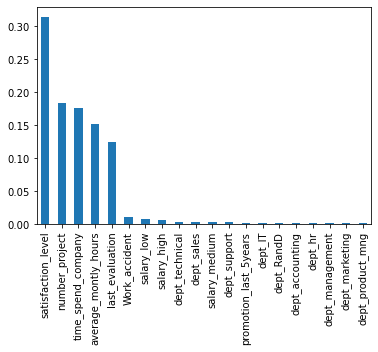

In [50]:
imp_feat.sort_values(ascending=False).plot(kind='bar')